### 2. **Gráficos para Visualización de Datos**
**Resumen:** La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

1. **Gráfico de Violín de Volumen de Ventas por Región:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])
# Para seleccionar unicamente las regiones propias , descartamos Total US para la vista gráfica
df_cp_cleaned=df_cp[df_cp.region != 'TotalUS']
df_cp_CA=df_cp[df_cp.region == 'California']
df_cp_noCA=df_cp[(df_cp.region != 'TotalUS') & (df_cp.region != "California")]
df_cp_noCA_conventional=df_cp[(df_cp.region != 'TotalUS') & (df_cp.region != "California") & (df_cp.type=='conventional')]
df_cp_noCA_organic=df_cp[(df_cp.region != 'TotalUS') & (df_cp.region != "California") & (df_cp.type=='organic')]
df_cp_organic=df_cp[(df_cp.region != 'TotalUS') & (df_cp.type=='organic')]
df_cp_conventional=df_cp[(df_cp.region != 'TotalUS') & (df_cp.type=='conventional')]
df_cp_Denver=df_cp[df_cp.region == 'Denver']

Text(0.5, 1.0, 'Total Volume en cada Region excepto TotalUS')

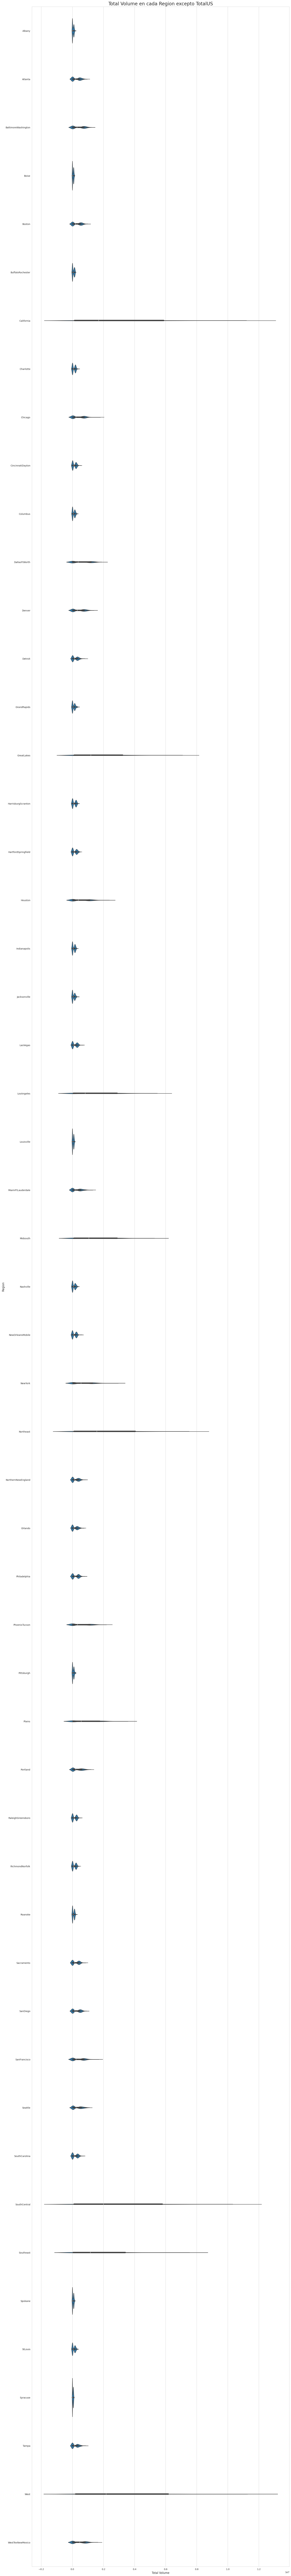

In [138]:

plt.figure(figsize=(20,200))
sns.set_style('whitegrid')
sns.violinplot(x='Total Volume',y='region', data=df_cp_cleaned)
plt.xlabel('Total Volume',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Total Volume en cada Region excepto TotalUS",{'fontsize':20})

Text(0.5, 1.0, 'Total Volume en cada región excepto TotalUS segun type')

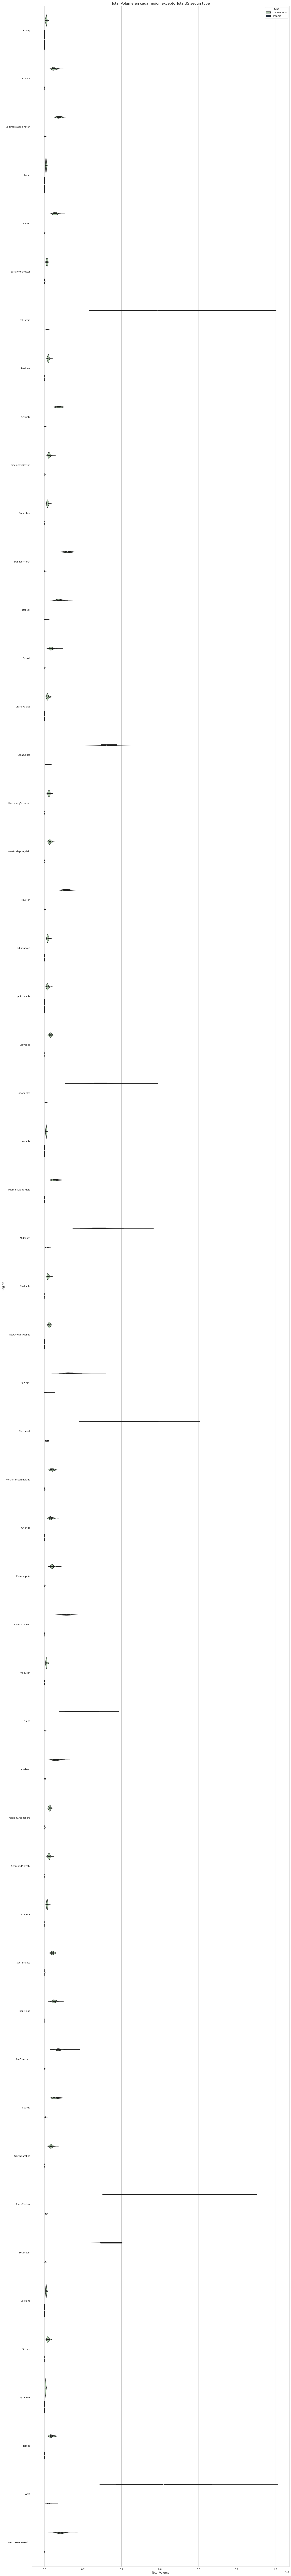

In [99]:
plt.figure(figsize=(20,200))
sns.set_style('whitegrid')
sns.violinplot(x='Total Volume',y='region',hue='type', data=df_cp_cleaned,palette="ch:r=-.5,l=.75")
plt.xlabel('Total Volume',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Total Volume en cada región excepto TotalUS segun type",{'fontsize':15})

Text(0.5, 1.0, 'Total Volume en cada región tipo convencional')

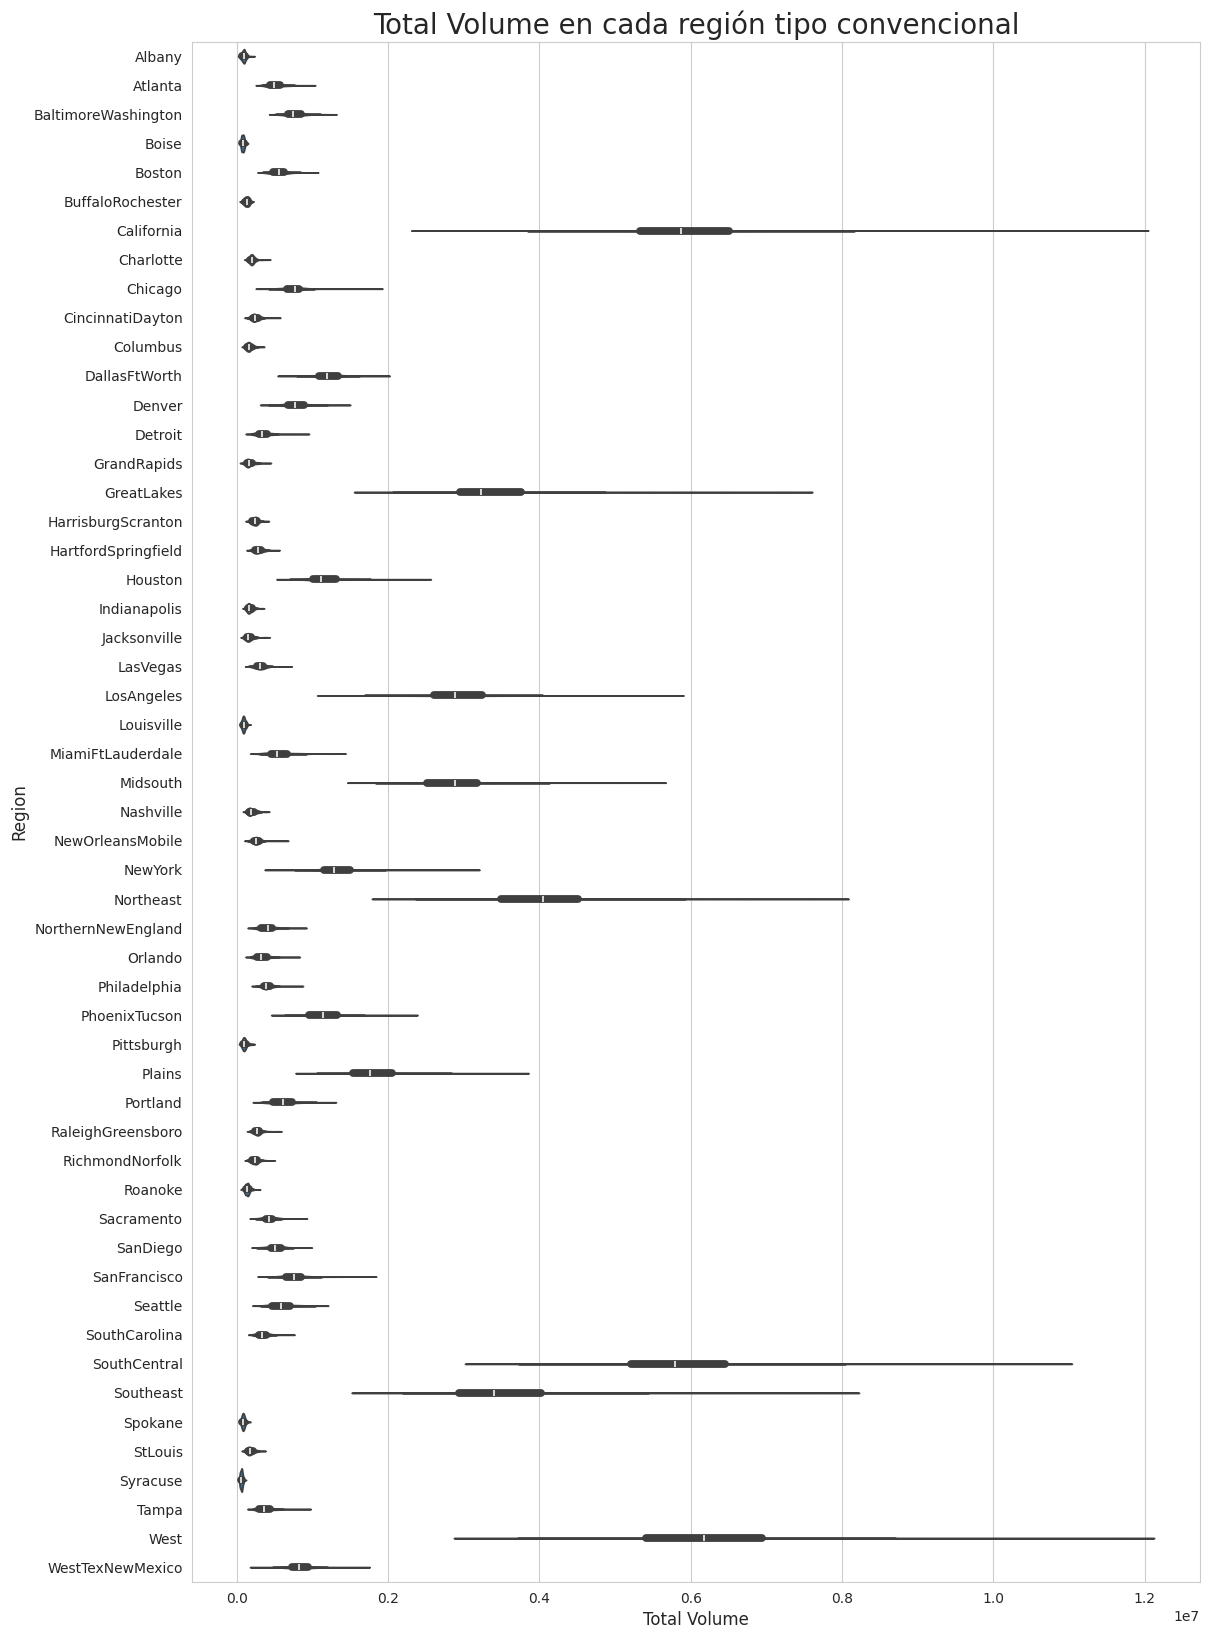

In [186]:
plt.figure(figsize=(13,20))
sns.set_style('whitegrid')
sns.violinplot(x='Total Volume',y='region', data=df_cp_conventional)
plt.xlabel('Total Volume',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Total Volume en cada región tipo convencional",{'fontsize':20})

Text(0.5, 1.0, 'Total Volume en cada región tipo organic')

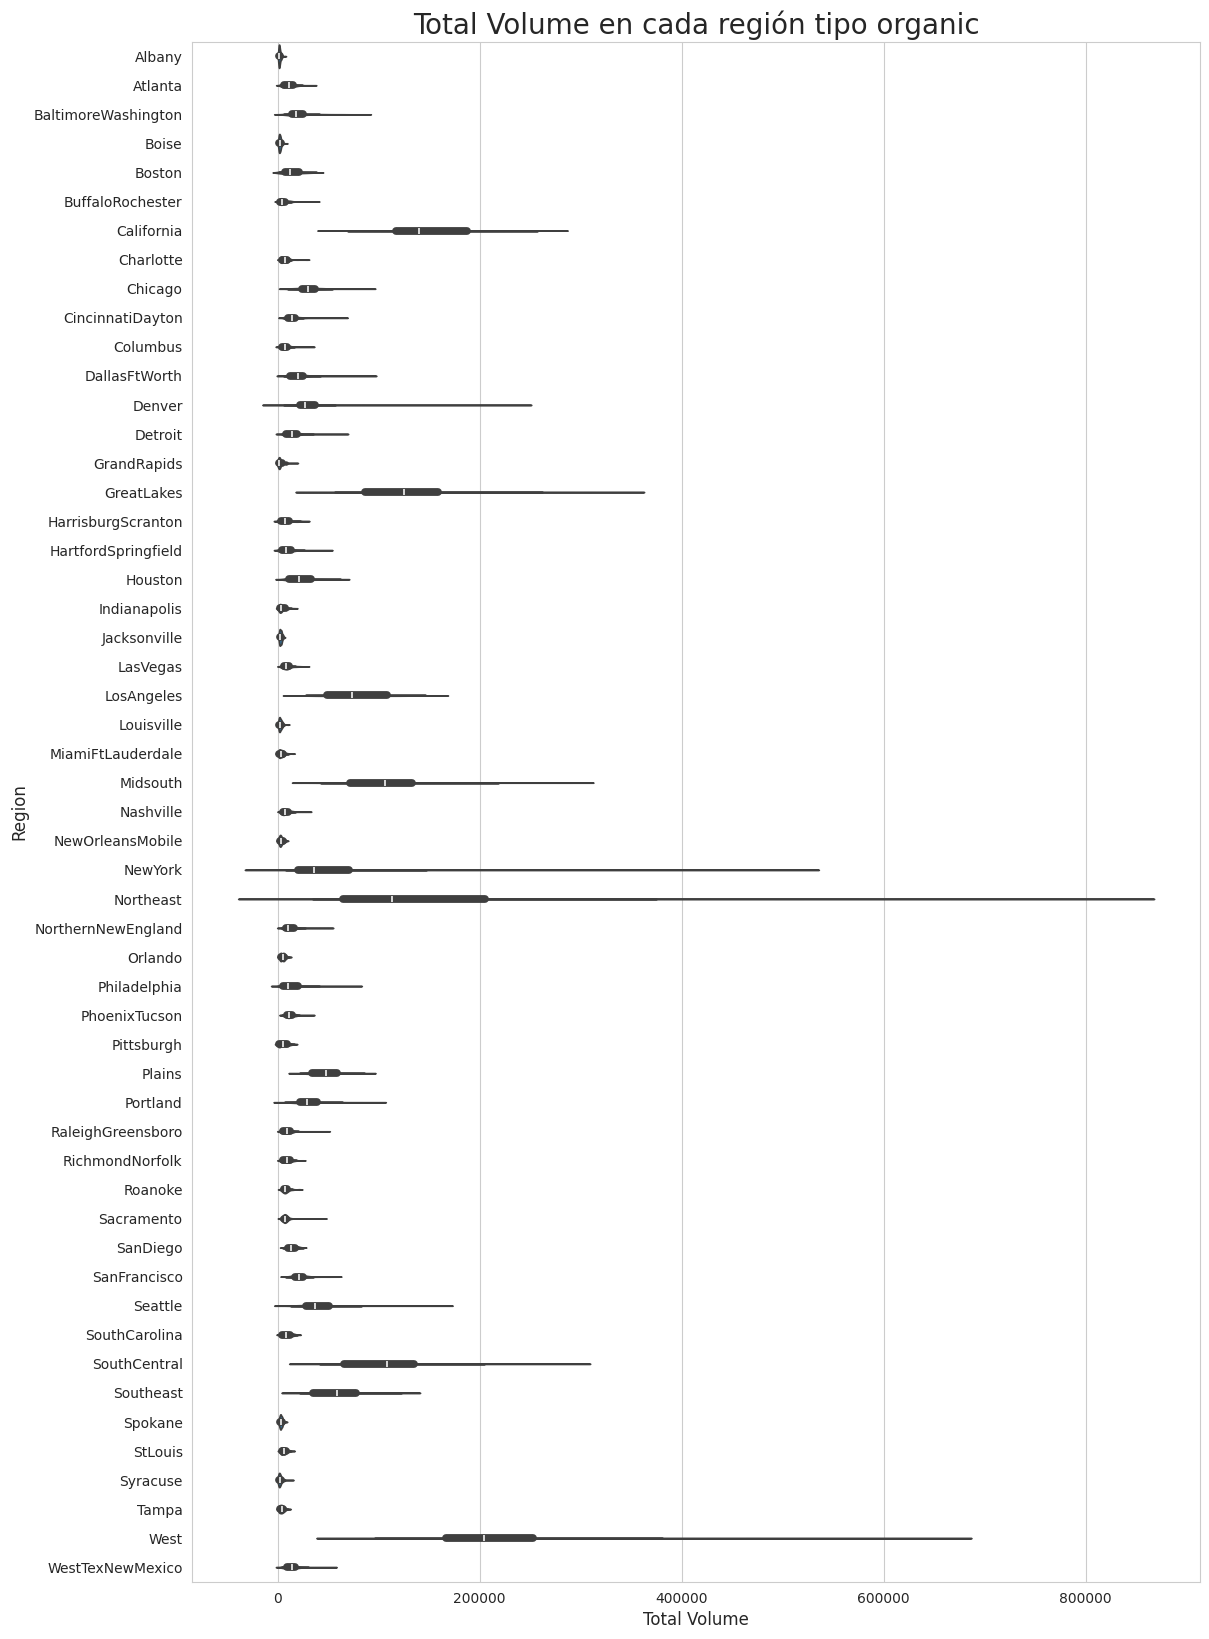

In [215]:
plt.figure(figsize=(13,20))
sns.set_style('whitegrid')
sns.violinplot(x='Total Volume',y='region', data=df_cp_organic)
plt.xlabel('Total Volume',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Total Volume en cada región tipo organic",{'fontsize':20})

2. **Boxplot Comparativo de Precios entre Años:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.

Text(0.5, 1.0, 'Average Price por año y region')

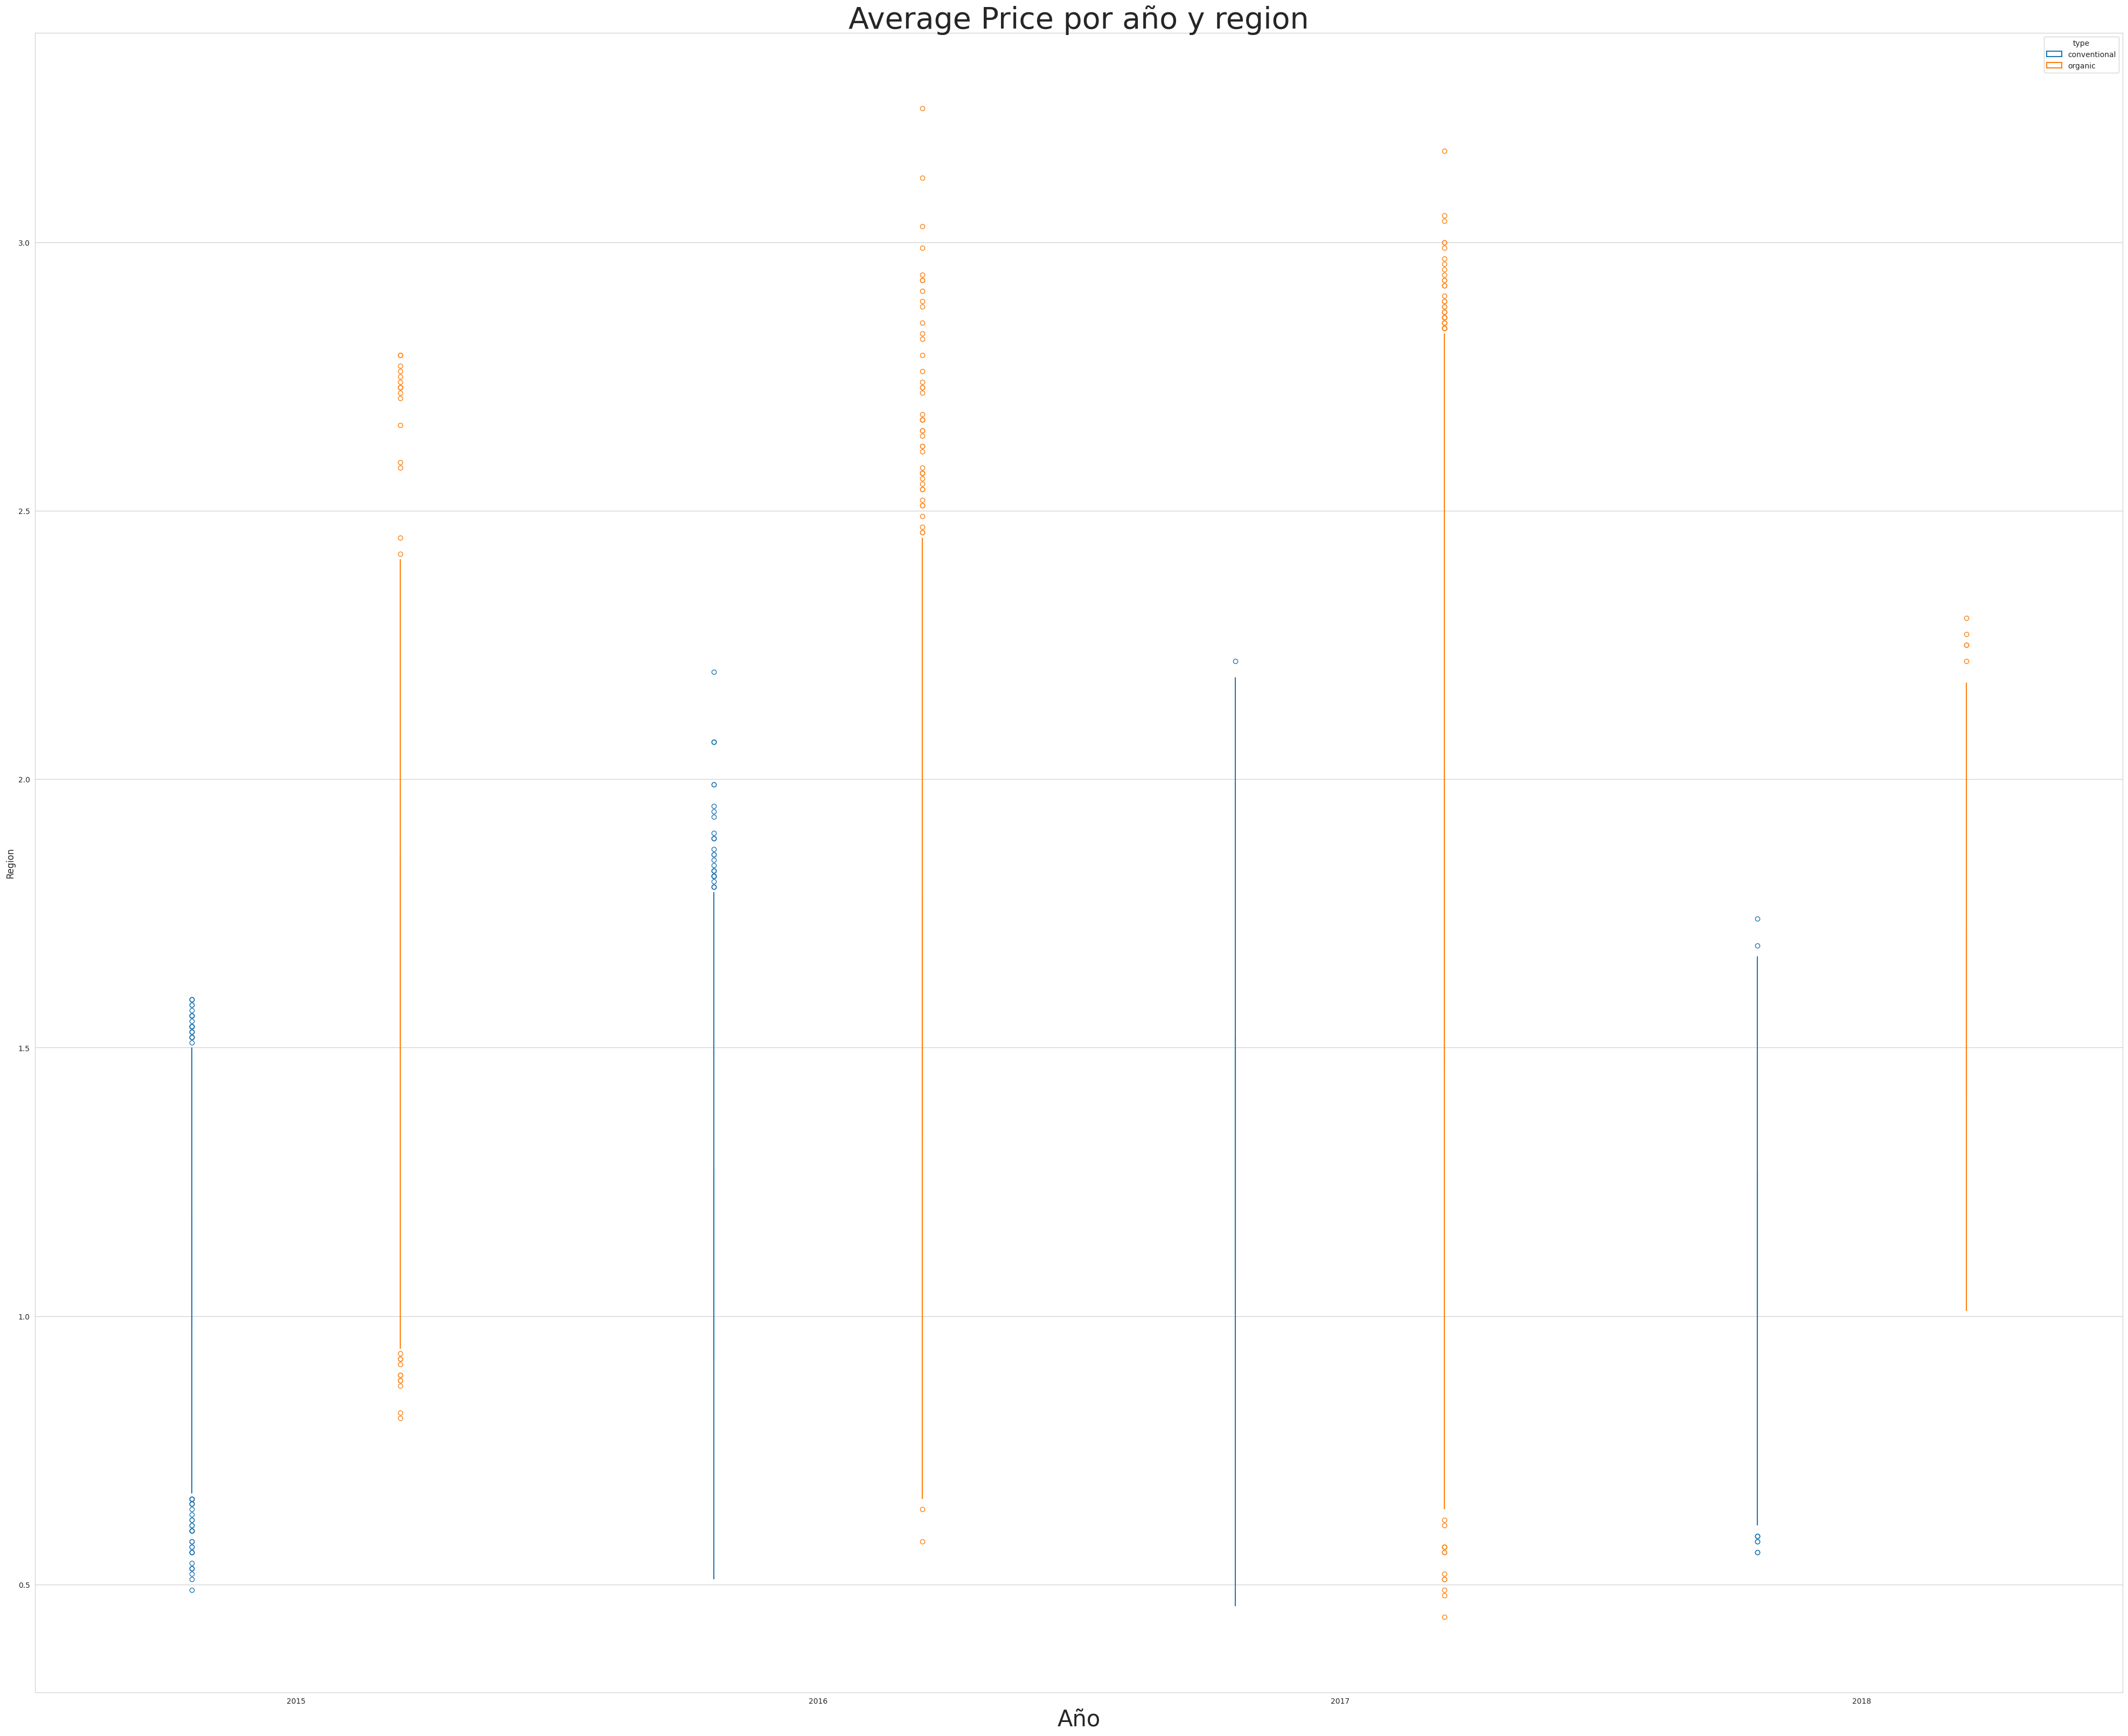

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

plt.figure(figsize=(50,40))
sns.boxplot(df_cp_cleaned, x="year", y="AveragePrice", hue='type', fill=False, gap=1)
plt.xlabel('Año',{'fontsize' : 30})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Average Price por año y region",{'fontsize':40})

Text(0.5, 1.0, 'Average Price Convencional por año y region')

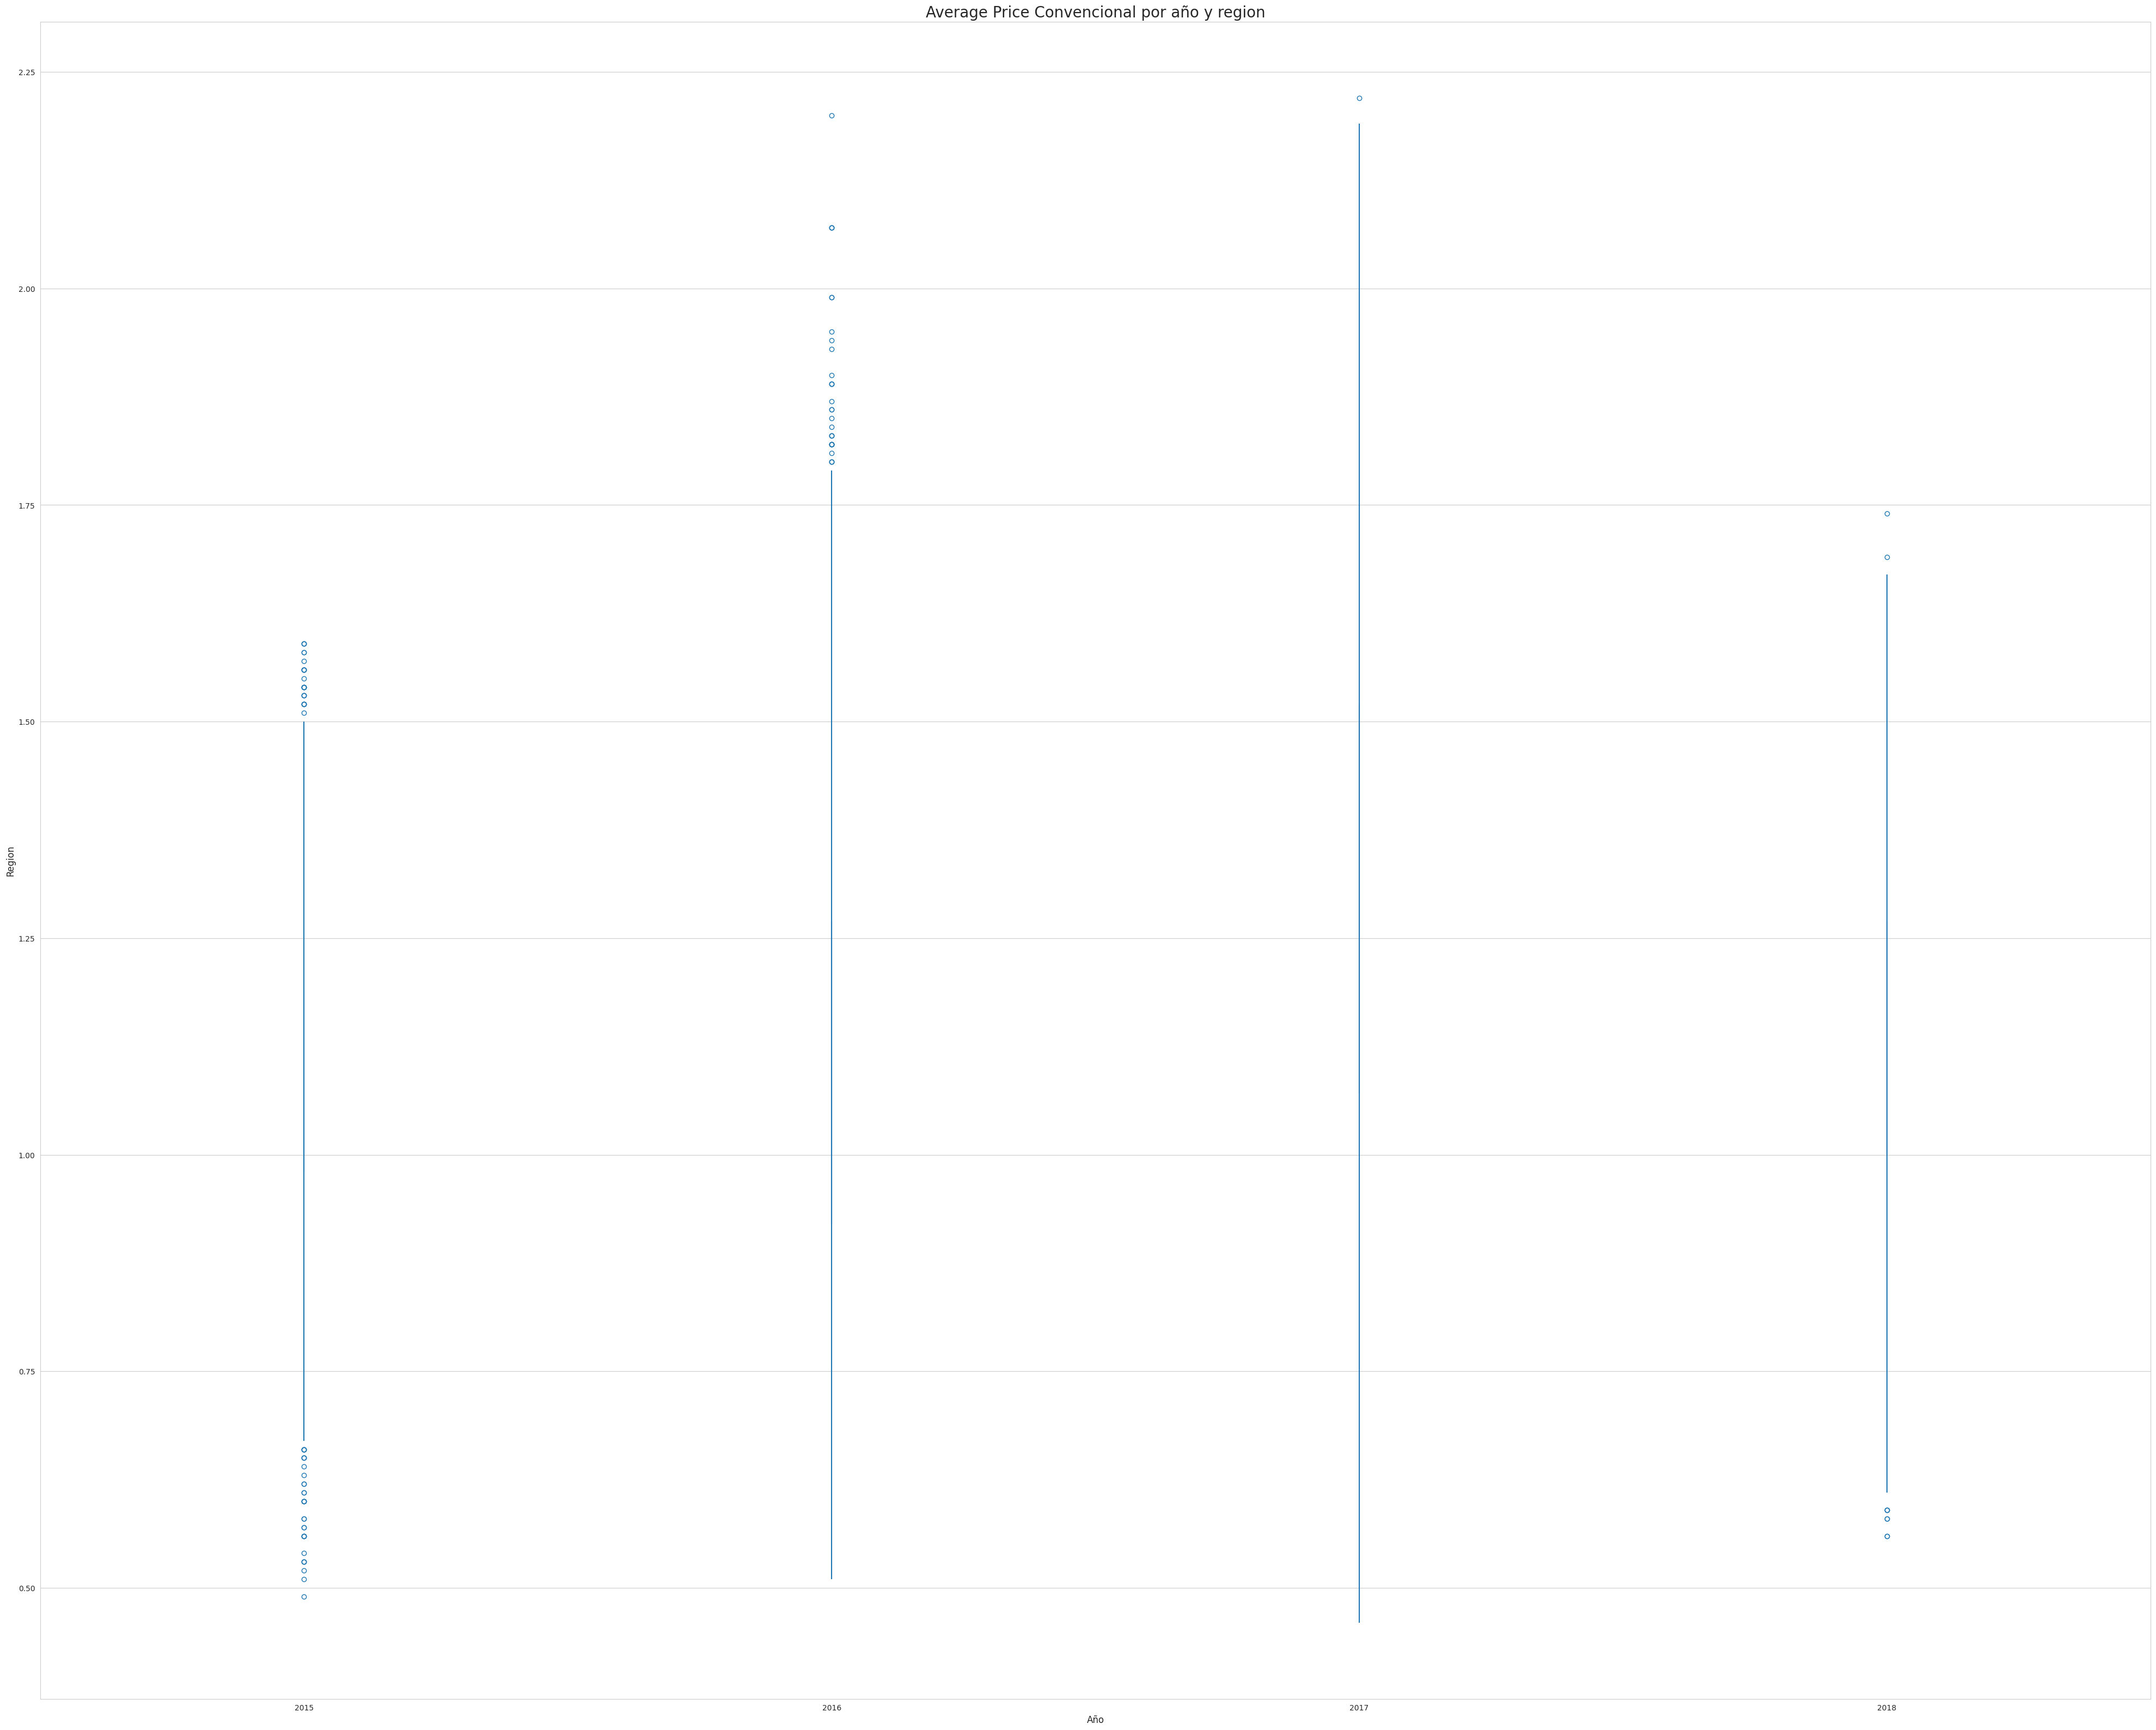

In [202]:
plt.figure(figsize=(50,40))
sns.boxplot(df_cp_conventional, x="year", y="AveragePrice", fill=False, gap=1)
plt.xlabel('Año',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Average Price Convencional por año y region",{'fontsize':20})

Text(0.5, 1.0, 'Average Price Organico por año y region')

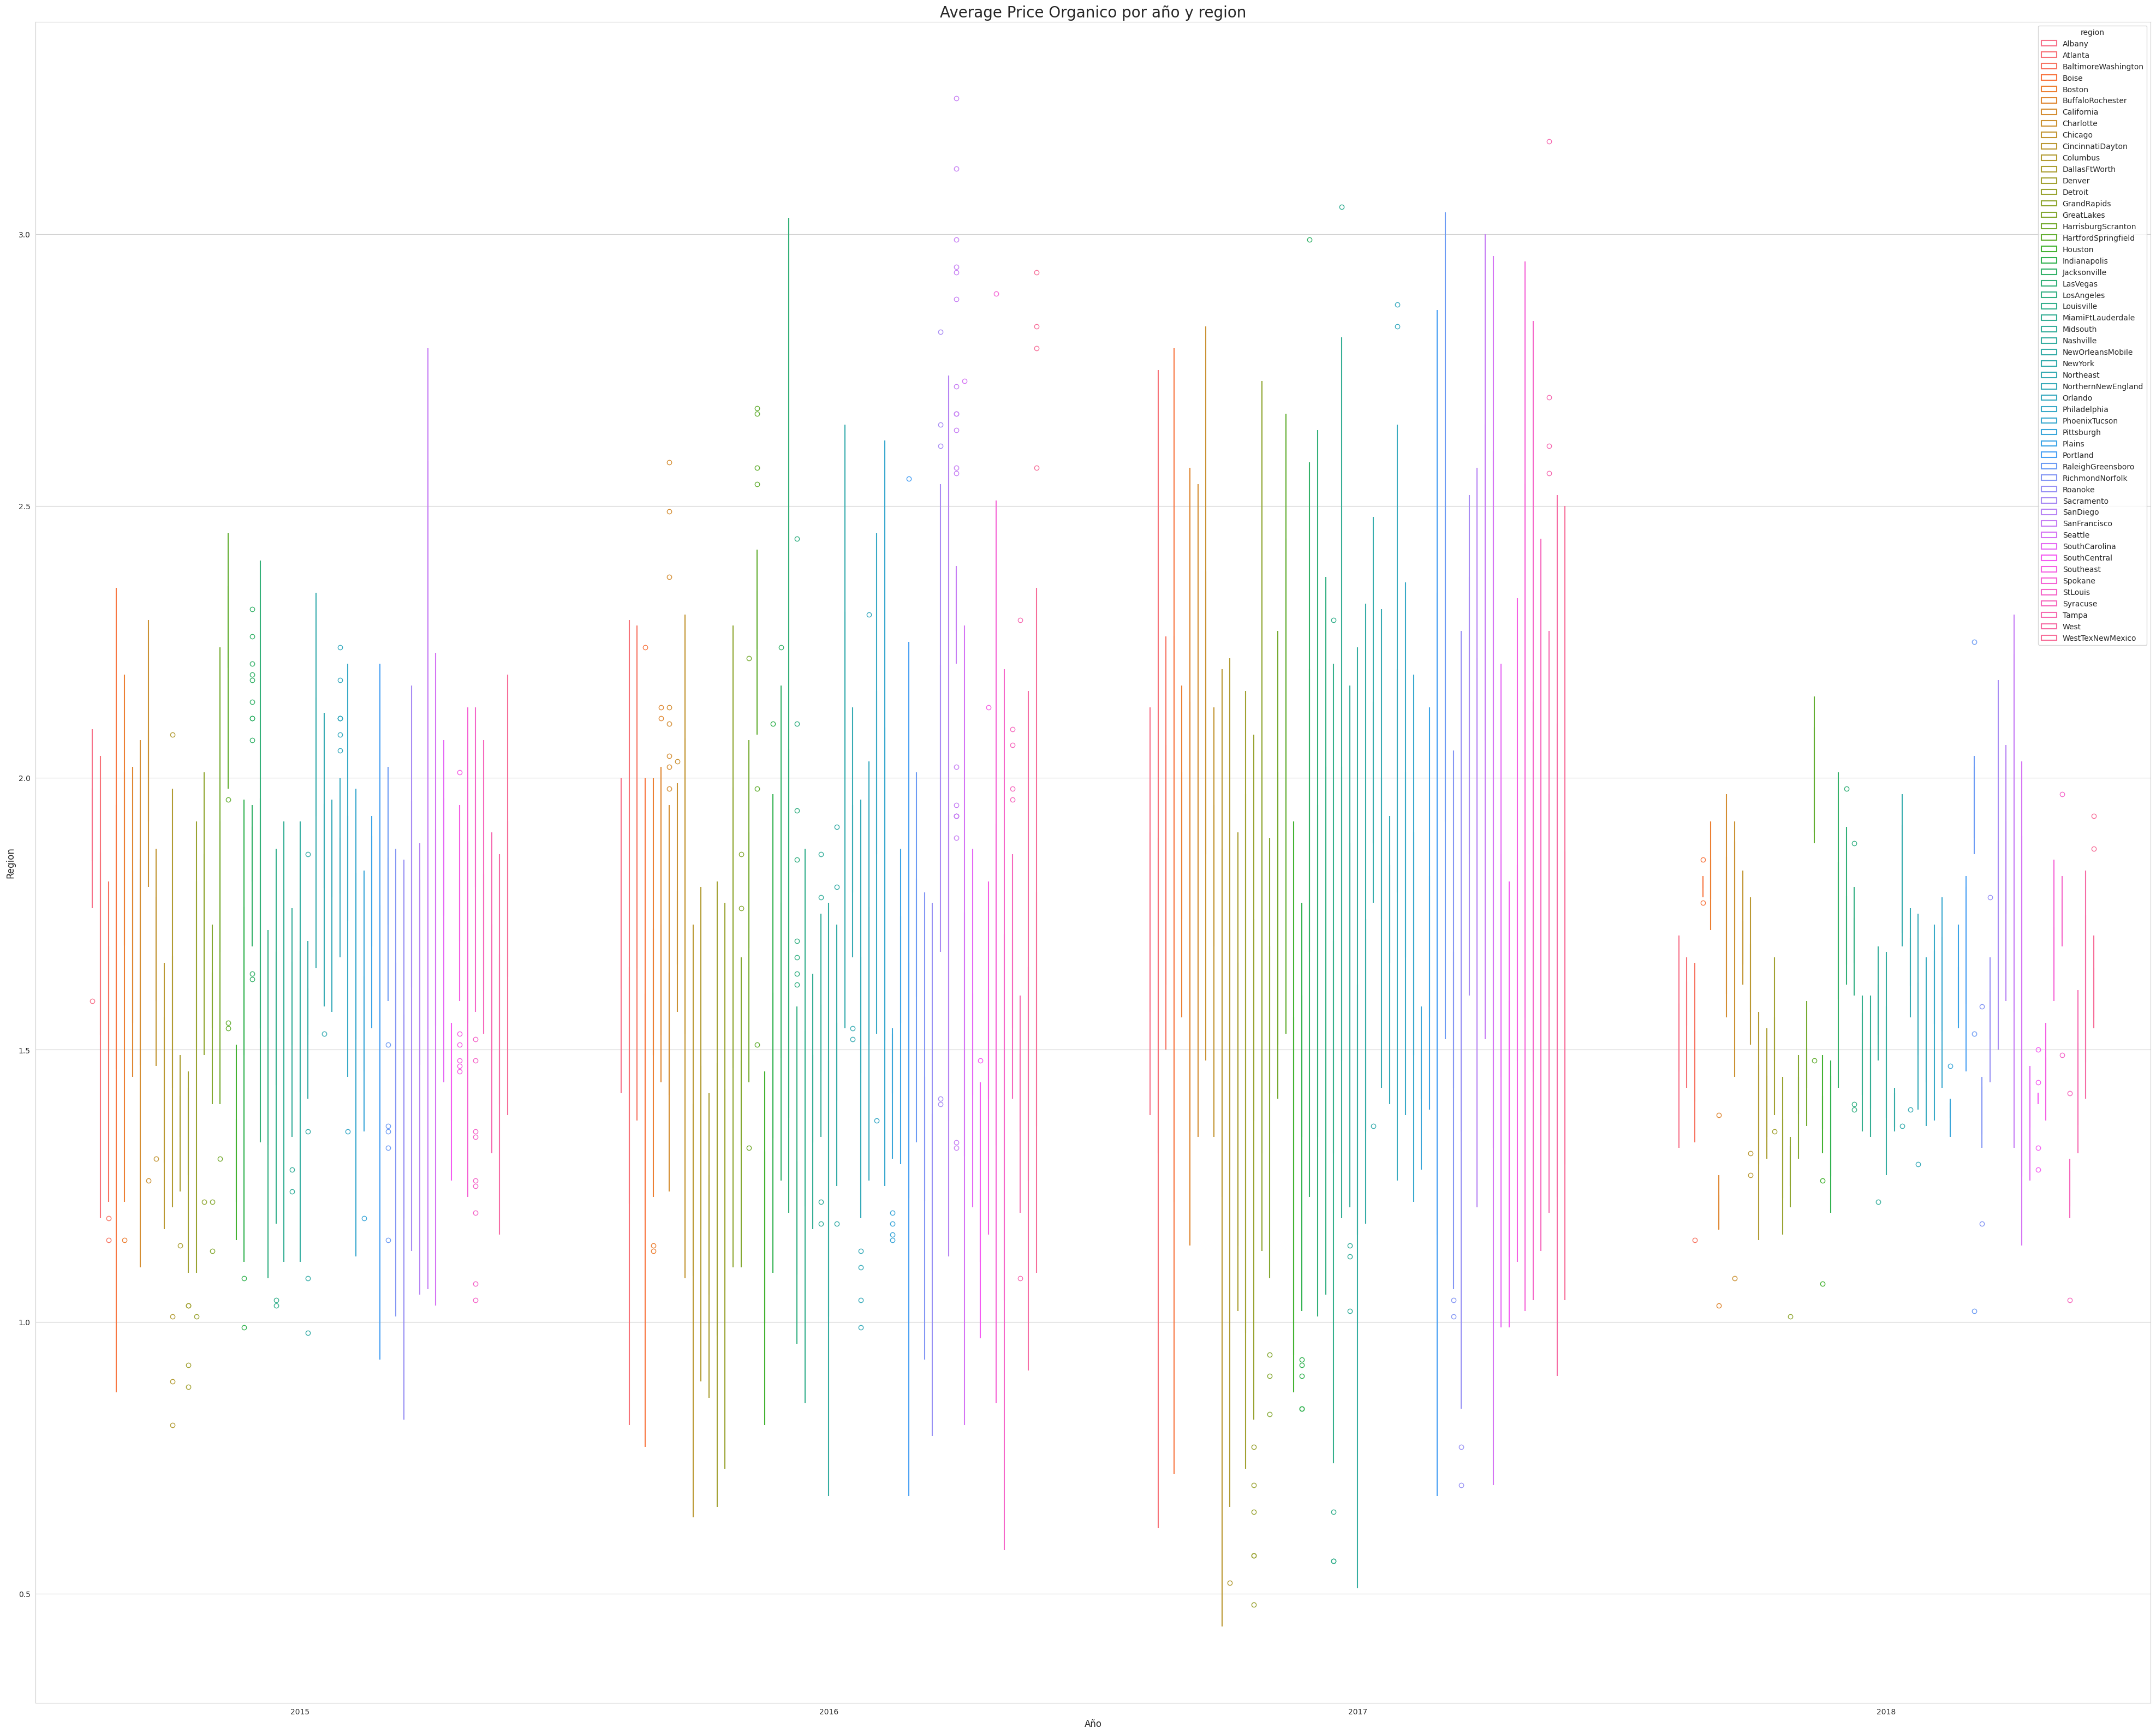

In [190]:
plt.figure(figsize=(50,40))
sns.boxplot(df_cp_organic, x="year", y="AveragePrice", hue="region", fill=False, gap=1)
plt.xlabel('Año',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Average Price Organico por año y region",{'fontsize':20})

3. **Histograma de Volumen Total de Ventas:**
   - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.



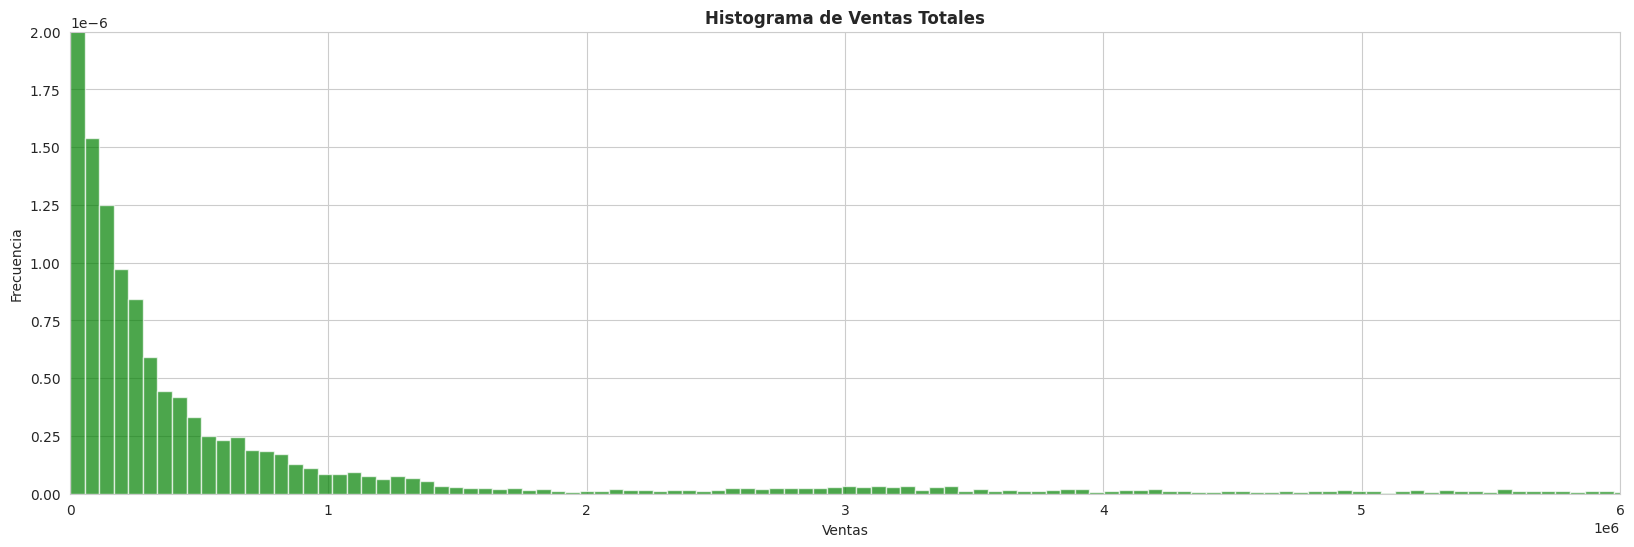

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])
plt.figure(figsize=(20,6))
plt.xlim(0.0,0.6*10**7)
plt.ylim(0.0,2*10**-6)
plt.title('Histograma de Ventas Totales', fontweight = "bold")
plt.hist(df_cp_cleaned['Total Volume'], bins= 200, density=0.5, color='green',alpha=0.7)
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# plt.title('Histograma de Ventas Totales Tipo Convencional', fontweight = "bold")
plt.hist(df_cp_conventional['Total Volume'], bins= 200, density=0.5, color='green',alpha=0.7)
plt.show()

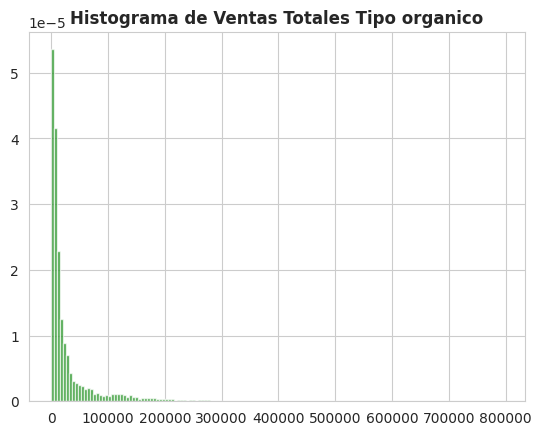

In [218]:
plt.title('Histograma de Ventas Totales Tipo organico', fontweight = "bold")
plt.hist(df_cp_organic['Total Volume'], bins= 150, density=0.5, color='green',alpha=0.7)
plt.show()

4. **Gráfico de Barras de Ventas por Tipo de Bolsa:**
   - **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.


<BarContainer object of 4 artists>

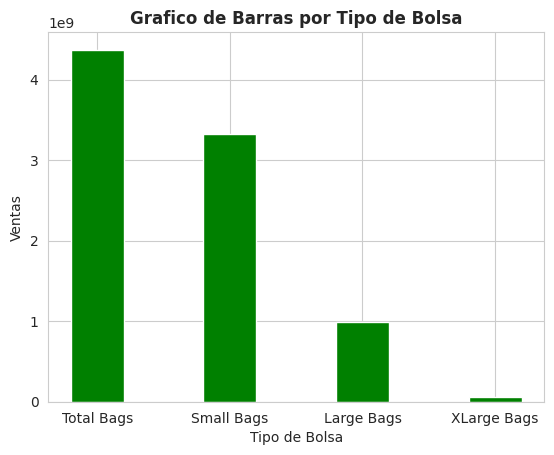

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])


tipos_bolsas=['Total Bags','Small Bags','Large Bags','XLarge Bags']
ventas=[df_cp['Total Bags'].sum(),df_cp['Small Bags'].sum(),df_cp['Large Bags'].sum(),df_cp['XLarge Bags'].sum()]

plt.title('Grafico de Barras por Tipo de Bolsa', fontweight = "bold")
plt.xlabel("Tipo de Bolsa")
plt.ylabel("Ventas")
plt.bar(tipos_bolsas,ventas, color ='green', width=0.4)

<BarContainer object of 4 artists>

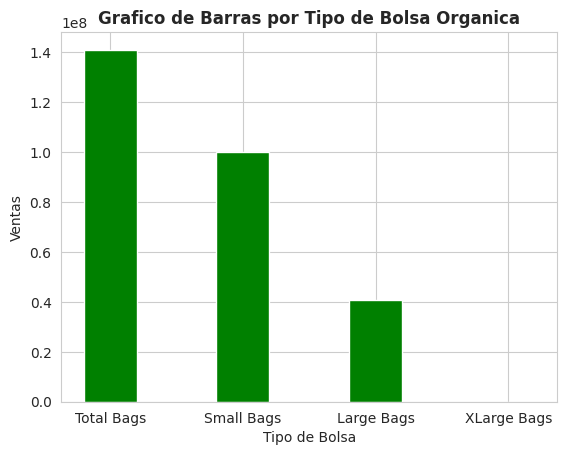

In [181]:
ventas_org=[df_cp_organic['Total Bags'].sum(),df_cp_organic['Small Bags'].sum(),df_cp_organic['Large Bags'].sum(),df_cp_organic['XLarge Bags'].sum()]
plt.title('Grafico de Barras por Tipo de Bolsa Organica', fontweight = "bold")
plt.xlabel("Tipo de Bolsa")
plt.ylabel("Ventas")
plt.bar(tipos_bolsas,ventas_org, color ='green', width=0.4)

<BarContainer object of 4 artists>

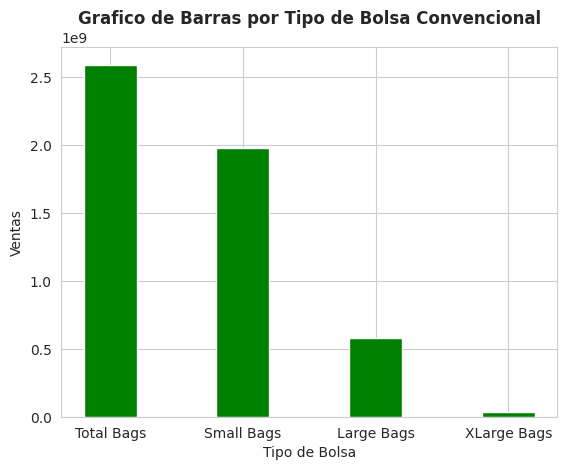

In [182]:
ventas_conv=[df_cp_conventional['Total Bags'].sum(),df_cp_conventional['Small Bags'].sum(),df_cp_conventional['Large Bags'].sum(),df_cp_conventional['XLarge Bags'].sum()]
plt.title('Grafico de Barras por Tipo de Bolsa Convencional', fontweight = "bold")
plt.xlabel("Tipo de Bolsa")
plt.ylabel("Ventas")
plt.bar(tipos_bolsas,ventas_conv, color ='green', width=0.4)

5. **Gráfico de Líneas de Precios Promedios por Año:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.


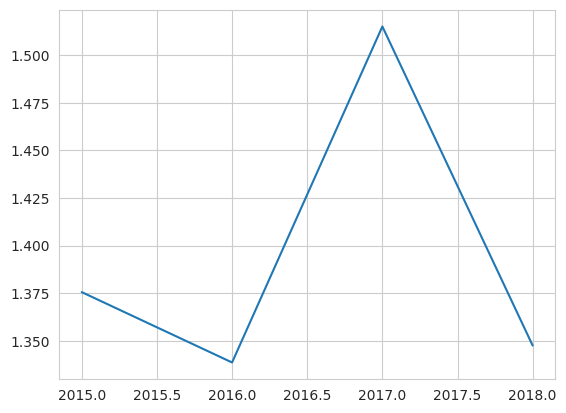

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

y=df_cp.groupby(['year'])['AveragePrice'].mean()
x=(df_cp['year'].unique())

plt.plot(x, y)
plt.show()

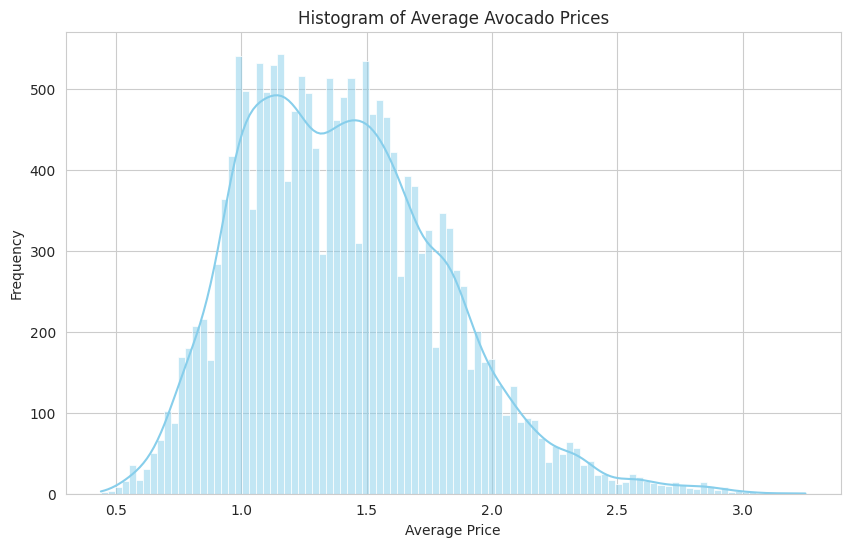

In [235]:
average_prices = df_cp['AveragePrice']

plt.figure(figsize=(10, 6))
sns.histplot(average_prices, bins=100, kde=True, color='skyblue')
plt.title('Histogram of Average Avocado Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64


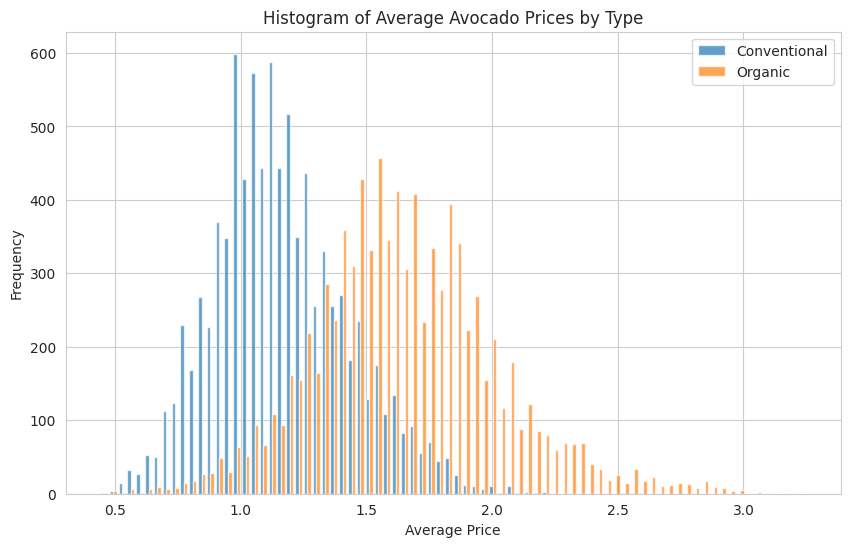

In [234]:
average_price_by_type = df_cp.groupby('type')['AveragePrice'].mean()
print(average_price_by_type)

plt.figure(figsize=(10, 6))
plt.hist(
    [df_cp_cleaned[df_cp_cleaned['type'] == 'conventional']['AveragePrice'], 
     df_cp_cleaned[df_cp_cleaned['type'] == 'organic']['AveragePrice']],
    bins=80, label=['Conventional', 'Organic'], alpha=0.7
)

# Add titles and labels
plt.title("Histogram of Average Avocado Prices by Type")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
